In [1]:
import sys

sys.path.append('../')

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
from nomopy.fhmm import FHMM

In [4]:
N = 1    # Number of time series
T = 200  # Number of samples per time series
d = 2    # Number of hidden fluctuators
k = 2    # Number of states for each fluctuator
o = 1    # Observable dimension

W, A, C, pi = FHMM.generate_random_model_params(T, d, k, o, seed=36)
C = np.array([[0.001]])  # Set low noise level

In [5]:
X, states = FHMM(T=T, d=d, o=o, k=k, W_fixed=W, A_fixed=A, C_fixed=C, pi_fixed=pi).generate(N, T, return_states=True)

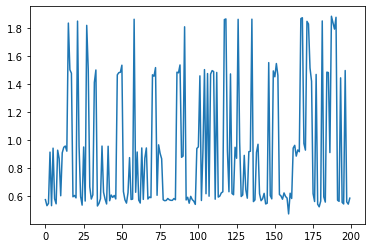

In [6]:
plt.plot(X[0, :, 0])
plt.savefig('example_X.png')
plt.show()

In [7]:
fhmm = FHMM(T=T, d=d, o=o, k=k, em_max_iter=100, method='exact', verbose=False)
fhmm.fit(X)

../nomopy/fhmm/FHMM.py:61: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float64, 2d, A), array(float64, 1d, C))
  y_mu += np.dot(W[idx_d, :, :], s_t[idx_d, :])


FHMM(A_fixed=array([[[-0.75141609, -1.65140211],
        [-0.6380874 , -0.212922  ]],

       [[-0.56798404, -1.67637739],
        [-0.83624802, -0.20708611]]]),
     C_fixed=array([[0.0009181]]), T=200,
     W_fixed=array([[[ 1.66704957,  0.75505515]],

       [[ 0.17523224, -0.17523224]]]),
     d=2, em_max_iter=100, k=2, method='exact', o=1,
     pi_fixed=array([[9.99999988e-09, 9.99999990e-01],
       [9.99999987e-09, 9.99999990e-01]]),
     verbose=False)

In [8]:
fhmm.log_likelihood()

199.47640912784544

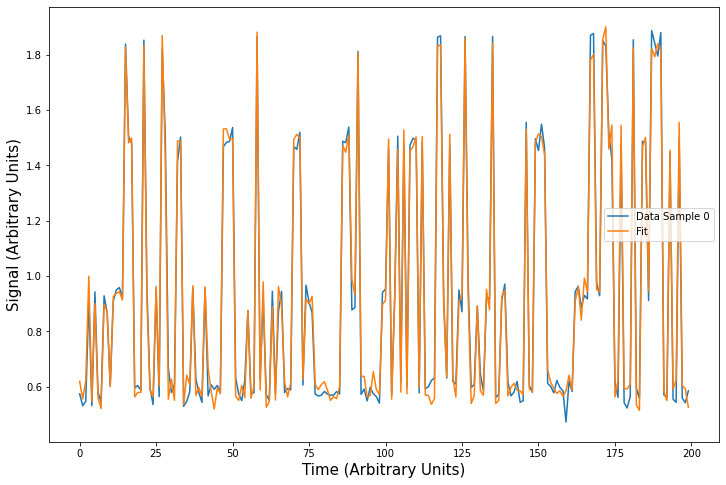

In [9]:
fhmm.plot_fit()
plt.savefig('example_fit.png')
plt.show()

In [10]:
viterbi = fhmm.viterbi(0)

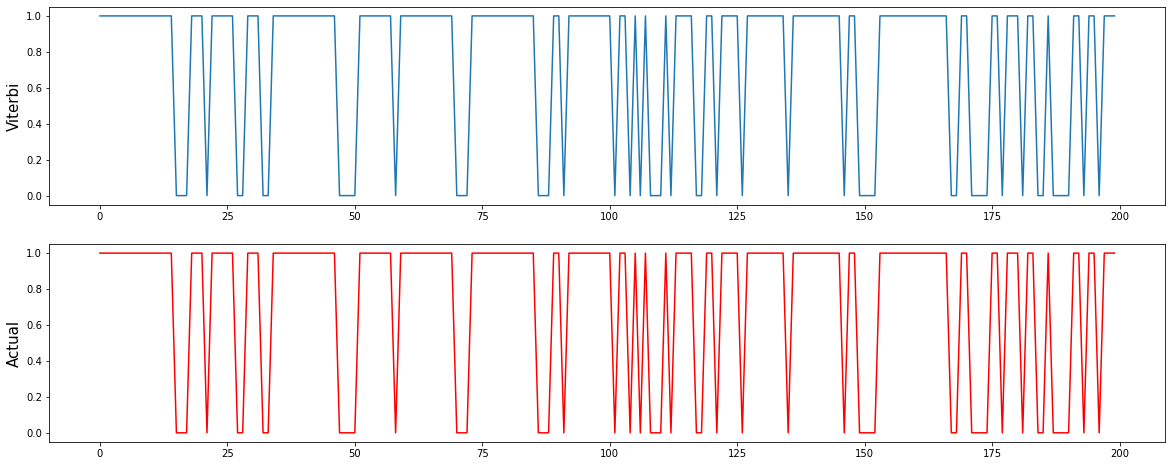

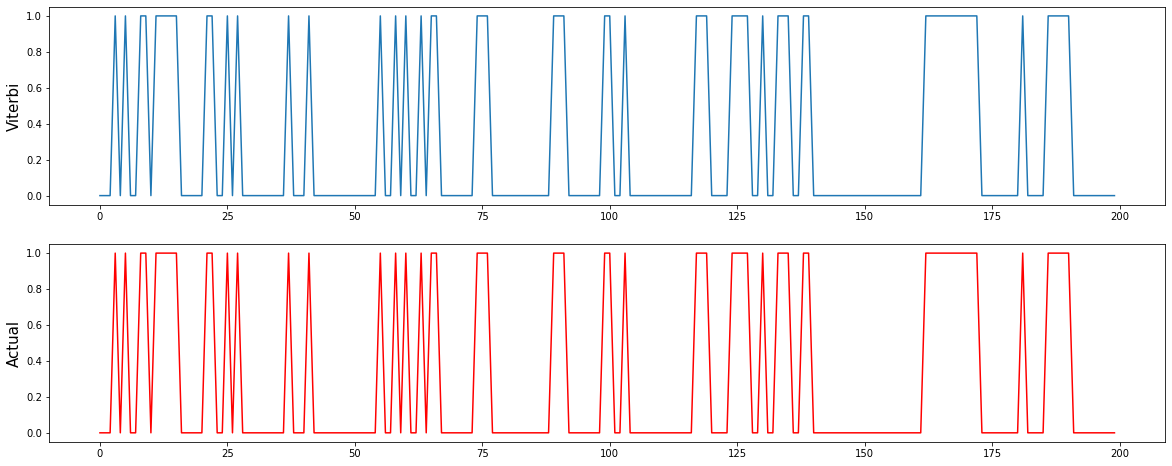

In [12]:
fig, axs = plt.subplots(2, 1, figsize=(20, 8))
axs[0].plot(viterbi[:, 0, 1])
axs[1].plot(states[0, :, 0, 0], c='r')
axs[0].set_ylabel('Viterbi', fontsize=15)
axs[1].set_ylabel('Actual', fontsize=15)
plt.savefig('example_viterbi_0.png')
plt.show()
fig, axs = plt.subplots(2, 1, figsize=(20, 8))
axs[0].plot(viterbi[:, 1, 0])
axs[1].plot(states[0, :, 1, 0], c='r')
axs[0].set_ylabel('Viterbi', fontsize=15)
axs[1].set_ylabel('Actual', fontsize=15)
plt.savefig('example_viterbi_1.png')
plt.show()